In [1]:
import pandas as pd

from crowd_evaluation import EvaluatorC
from datasets import EntailmentDataset, TemDataset
import numpy as np
from evaluation_utils.utils import calculate_estimation_accuracy
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
ent = EntailmentDataset('/Users/julianassmann/Documents/Bachelor-Thesis/Code/datasets/ent_tem/rte.standardized.tsv',
                            prefilter_mode=None)
ent_filtered = EntailmentDataset('/Users/julianassmann/Documents/Bachelor-Thesis/Code/datasets/ent_tem/rte.standardized.tsv',
                            prefilter_mode='majority_vote')
tem = dataset = TemDataset('/Users/julianassmann/Documents/Bachelor-Thesis/Code/datasets/ent_tem/temp.standardized.tsv',
                           prefilter_mode=None)
tem_filtered = TemDataset('/Users/julianassmann/Documents/Bachelor-Thesis/Code/datasets/ent_tem/temp.standardized.tsv',
                            prefilter_mode='majority_vote')

ent_eval = EvaluatorC(ent)
ent_filtered_eval = EvaluatorC(ent_filtered)
tem_eval = EvaluatorC(tem)
tem_filtered_eval = EvaluatorC(tem_filtered)

In [3]:
from evaluation_utils.utils import calculate_estimation_accuracy

ent_accuracies = []
ent_filtered_accuracies = []
tem_accuracies = []
tem_filtered_accuracies = []

confidence_levels = np.arange(5, 100, step=5) / 100.0

for c in confidence_levels:
    print('Confidence:', c)

    ent_ps, ent_confs = ent_eval.evaluate_workers(ent.workers, c)
    ent_accuracy = calculate_estimation_accuracy(
        ent.get_measured_error_rates_for_workers(ent.workers),
        ent_ps, ent_confs)
    ent_accuracies.append(ent_accuracy)
    print('\tent:', ent_accuracy)

    ent_filtered_cs, ent_filtered_confs = ent_filtered_eval.evaluate_workers(ent_filtered.workers, c)
    ent_filtered_accuracy = calculate_estimation_accuracy(
        ent_filtered.get_measured_error_rates_for_workers(ent_filtered.workers),
        ent_filtered_cs, ent_filtered_confs)
    ent_filtered_accuracies.append(ent_filtered_accuracy)
    print('\tent filtered:', ent_filtered_accuracy)

    tem_cs, tem_confs = tem_eval.evaluate_workers(tem.workers, c)
    tem_accuracy = calculate_estimation_accuracy(
        tem.get_measured_error_rates_for_workers(tem.workers),
        tem_cs, tem_confs)
    tem_accuracies.append(tem_accuracy)
    print('\ttem:', tem_accuracy)

    tem_filtered_cs, tem_filtered_confs = tem_filtered_eval.evaluate_workers(tem_filtered.workers, c)
    tem_filtered_accuracy = calculate_estimation_accuracy(
        tem_filtered.get_measured_error_rates_for_workers(tem_filtered.workers),
        tem_filtered_cs, tem_filtered_confs)
    tem_filtered_accuracies.append(tem_filtered_accuracy)
    print('\ttem filtered:', tem_filtered_accuracy)


Confidence: 0.05
	ent: 0.03048780487804878
	ent filtered: 0.025
	tem: 0.10425531914893617


/Users/julianassmann/PycharmProjects/Bachelor/crowd_evaluation/evaluator_c.py:128: RuntimeWarning: invalid value encountered in true_divide
  A = B / np.linalg.norm(B, ord=1)


	tem filtered: 0.20402298850574713
Confidence: 0.1
	ent: 0.09146341463414634
	ent filtered: 0.06875
	tem: 0.16170212765957448
	tem filtered: 0.21264367816091953
Confidence: 0.15
	ent: 0.16463414634146342
	ent filtered: 0.09375
	tem: 0.19787234042553192
	tem filtered: 0.22701149425287356
Confidence: 0.2
	ent: 0.1951219512195122
	ent filtered: 0.14375
	tem: 0.23829787234042554
	tem filtered: 0.25
Confidence: 0.25
	ent: 0.23780487804878048
	ent filtered: 0.18125
	tem: 0.2531914893617021
	tem filtered: 0.25
Confidence: 0.3
	ent: 0.2804878048780488
	ent filtered: 0.20625
	tem: 0.2702127659574468
	tem filtered: 0.28160919540229884
Confidence: 0.35
	ent: 0.3048780487804878
	ent filtered: 0.225
	tem: 0.2872340425531915
	tem filtered: 0.2959770114942529
Confidence: 0.4
	ent: 0.3231707317073171
	ent filtered: 0.25
	tem: 0.30425531914893617
	tem filtered: 0.3160919540229885
Confidence: 0.45
	ent: 0.34146341463414637
	ent filtered: 0.275
	tem: 0.3170212765957447
	tem filtered: 0.3333333333333333
C

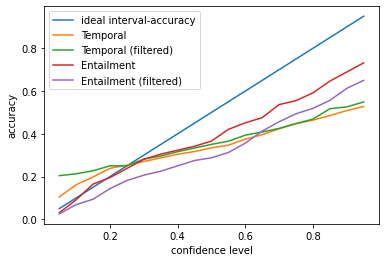

In [4]:
plt.plot(confidence_levels, confidence_levels, label='ideal interval-accuracy')
plt.plot(confidence_levels, tem_accuracies, label='Temporal')
plt.plot(confidence_levels, tem_filtered_accuracies, label='Temporal (filtered)')
plt.plot(confidence_levels, ent_accuracies, label='Entailment')
plt.plot(confidence_levels, ent_filtered_accuracies, label='Entailment (filtered)')
plt.xlabel('confidence level')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [25]:
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=confidence_levels, y=confidence_levels, name="optimal"))
fig.add_trace(go.Scatter(x=confidence_levels, y=tem_accuracies, name="TEM"))
fig.add_trace(go.Scatter(x=confidence_levels, y=tem_filtered_accuracies, name="TEM (filtered)"))
fig.add_trace(go.Scatter(x=confidence_levels, y=ent_accuracies, name="ENT"))
fig.add_trace(go.Scatter(x=confidence_levels, y=ent_filtered_accuracies, name="ENT (filtered)"))
fig.update_layout(
    title="Plot Title",
    xaxis_title="confidence level",
    yaxis_title="accuracy",
    legend_title="",
)
fig.show()